In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 연봉데이터 로딩, 전처리, EDA, Feature Engineering
# modeling, 성능 검증, 하이퍼파라미터 튜닝

## 기본 모델 : DesicionTree - 성능기준
## 배깅, 부스팅, 랜덤배깅 모델 튜닝
### 분석 목적 : 학력, 교육, 연수, 혼인 상태, 직업정보가 있는 연봉데이터셋을 이용해 연봉 예측하기
#### 연봉이 5만 달러 이상인지 아닌지 

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/salary2.csv")
data.head()
#class가 타겟 변수

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


age: 나이
workclass: 직업군(고용 형태)
education: 교육 수준(학력)
education-num: 교육 연수
marital-status: 결혼 상태
occupation: 직업
relationship: 가족 관계
race: 인종
sex: 성별
capital-gain: 자본 소득(자산 증가)
capital-loss: 자본 손실(자산 감소)
hours-per-week: 주당 근로 시간
native-country: 출신(본국)
class : 연봉 구분 - target

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [4]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [5]:
data.isna().sum()

age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

In [6]:
data.isna().sum() / len(data) * 100

age               0.000000
workclass         5.730724
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.754637
class             0.000000
dtype: float64

In [7]:
data[data['workclass'].isna() == True]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,NaN,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
22,72,NaN,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,NaN,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
48812,30,NaN,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,NaN,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
48822,41,NaN,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [8]:
data[data['occupation'].isna() == True]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,NaN,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
22,72,NaN,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,NaN,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
48812,30,NaN,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,NaN,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
48822,41,NaN,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [9]:
data[data['native-country'].isna() == True]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
19,40,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,NaN,>50K
65,41,Private,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,40,NaN,<=50K
83,44,Self-emp-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,NaN,>50K
188,34,State-gov,Bachelors,13,Married-spouse-absent,Farming-fishing,Not-in-family,Black,Male,0,0,40,NaN,<=50K
253,42,Federal-gov,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48730,44,Self-emp-inc,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,NaN,>50K
48750,58,Self-emp-inc,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,NaN,<=50K
48773,42,Self-emp-not-inc,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,NaN,<=50K
48791,39,Private,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,NaN,>50K


In [10]:
data['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [11]:
data['workclass'].unique()

array([' Private', ' Local-gov', nan, ' Self-emp-not-inc', ' Federal-gov',
       ' State-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [12]:
data['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [13]:
data1 = data.copy()
data2 = data.copy()
data3 = data.copy()

In [14]:
nan_workclass = data1[data1['workclass'].isna()]
# # 성별에 따른 평균을 계산 (sex는 보통 범주형 데이터이므로 이진화가 필요)
# # 예를 들어 'Male'을 1, 'Female'을 0으로 변환한 후 평균을 구할 수 있음
nan_workclass.loc[:, 'sex'] = nan_workclass['sex'].str.replace(" Female", "1").str.replace(" Male", "0")
# # 성별 평균 계산
nan_workclass['sex'] = nan_workclass['sex'].astype('int')
sex_mean = nan_workclass['sex'].mean()
sex_mean

C:\Users\5-12\AppData\Local\Temp\ipykernel_13528\234722940.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_workclass['sex'] = nan_workclass['sex'].astype('int')


np.float64(0.45373347624151483)

In [15]:
# 직업군이 nan 값인 데이터의 가족관계 구성 확인
nan_workclass['relationship'].value_counts()

relationship
Own-child         868
Husband           711
Not-in-family     666
Unmarried         258
Wife              191
Other-relative    105
Name: count, dtype: int64

In [16]:
nan_workclass['class'].value_counts()

class
<=50K    2534
>50K      265
Name: count, dtype: int64

In [17]:
nan_workclass['age'].mean()

np.float64(40.14112182922472)

In [18]:

# # 성별에 따른 평균을 계산 (sex는 보통 범주형 데이터이므로 이진화가 필요)
# # 예를 들어 'Male'을 1, 'Female'을 0으로 변환한 후 평균을 구할 수 있음
nan_workclass.loc[:, 'class'] = nan_workclass['class'].str.replace(" <=50K", "1").str.replace(" >50K", "0")
# # 성별 평균 계산
nan_workclass['class'] = nan_workclass['class'].astype('int')
class_mean = nan_workclass['class'].mean()
class_mean

C:\Users\5-12\AppData\Local\Temp\ipykernel_13528\2833875021.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_workclass['class'] = nan_workclass['class'].astype('int')


np.float64(0.9053233297606288)

In [19]:
nan_workclass.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2799 entries, 4 to 48823
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             2799 non-null   int64 
 1   workclass       0 non-null      object
 2   education       2799 non-null   object
 3   education-num   2799 non-null   int64 
 4   marital-status  2799 non-null   object
 5   occupation      0 non-null      object
 6   relationship    2799 non-null   object
 7   race            2799 non-null   object
 8   sex             2799 non-null   int64 
 9   capital-gain    2799 non-null   int64 
 10  capital-loss    2799 non-null   int64 
 11  hours-per-week  2799 non-null   int64 
 12  native-country  2753 non-null   object
 13  class           2799 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 328.0+ KB


In [20]:
nan_workclass[['class', 'age', 'sex']].corr()

,class,age,sex
class,1.000000,-0.247598,0.110889
age,-0.247598,1.000000,-0.180893
sex,0.110889,-0.180893,1.000000


In [21]:
# 고용 형태 결측값 무직으로 처리
data['workclass'] = data['workclass'].fillna(' Without-pay')

In [22]:
data['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [23]:
data['occupation'].unique()

array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv', nan,
       ' Other-service', ' Prof-specialty', ' Craft-repair',
       ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',
       ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners',
       ' Armed-Forces'], dtype=object)

In [24]:
data['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [25]:
data['native-country'].unique()

array([' United-States', nan, ' Peru', ' Guatemala', ' Mexico',
       ' Dominican-Republic', ' Ireland', ' Germany', ' Philippines',
       ' Thailand', ' Haiti', ' El-Salvador', ' Puerto-Rico', ' Vietnam',
       ' South', ' Columbia', ' Japan', ' India', ' Cambodia', ' Poland',
       ' Laos', ' England', ' Cuba', ' Taiwan', ' Italy', ' Canada',
       ' Portugal', ' China', ' Nicaragua', ' Honduras', ' Iran',
       ' Scotland', ' Jamaica', ' Ecuador', ' Yugoslavia', ' Hungary',
       ' Hong', ' Greece', ' Trinadad&Tobago',
       ' Outlying-US(Guam-USVI-etc)', ' France', ' Holand-Netherlands'],
      dtype=object)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [27]:
data['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [28]:
data['occupation'].unique()

array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv', nan,
       ' Other-service', ' Prof-specialty', ' Craft-repair',
       ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',
       ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners',
       ' Armed-Forces'], dtype=object)

In [29]:
# 국적 결측값 US로 처리
data['native-country'] = data['native-country'].fillna(' United-States')

In [30]:
data['occupation'] = data['occupation'].fillna(' Other-service')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


### 범주형 자료를 숫자로 변환하기

In [32]:
data1 = data.copy()
data2 = data.copy()
data3 = data.copy()

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test = le.fit(data1['sex'])
le.classes_
result = le.transform(data1['sex'])
print(result)
data1['sex'] = result

[1 1 1 ... 0 1 0]


In [34]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  int64 
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  class           48842 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [35]:
le2 = LabelEncoder()
test = le2.fit(data1['class'])
le2.classes_
result2 = le2.transform(data1['class'])
data1['class'] = result2

In [36]:
print(result2)

[0 0 1 ... 0 0 1]


In [37]:
print(le2.classes_)

[' <=50K' ' >50K']


In [38]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  int64 
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  class           48842 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 5.2+ MB


In [39]:
data1.head(3)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States,1


In [40]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  int64 
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  class           48842 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 5.2+ MB


In [41]:
data1['education'].unique()

array([' 11th', ' HS-grad', ' Assoc-acdm', ' Some-college', ' 10th',
       ' Prof-school', ' 7th-8th', ' Bachelors', ' Masters', ' Doctorate',
       ' 5th-6th', ' Assoc-voc', ' 9th', ' 12th', ' 1st-4th',
       ' Preschool'], dtype=object)

In [42]:
data1['education-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1])

1. 범주화 기준 설정
기본/중등 교육: education-num 값이 0부터 9 이하인 경우
대학 교육: education-num 값이 10에서 13 사이인 경우
고등 교육: education-num 값이 14 이상인 경우

In [43]:
# 범주화 함수를 정의
def categorize_education(row):
    if row['education-num'] <= 9:
        return '기본/중등 교육'
    elif 10 <= row['education-num'] <= 13:
        return '대학 교육'
    elif row['education-num'] >= 14:
        return '고등 교육'

# 새로운 범주화된 컬럼 추가
data1['education_category'] = data1.apply(categorize_education, axis=1)

# 결과 확인
data1[['education', 'education-num', 'education_category']].head()

,education,education-num,education_category
0,11th,7,기본/중등 교육
1,HS-grad,9,기본/중등 교육
2,Assoc-acdm,12,대학 교육
3,Some-college,10,대학 교육
4,Some-college,10,대학 교육


In [44]:
data1.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,education_category
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,0,기본/중등 교육
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States,0,기본/중등 교육
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States,1,대학 교육
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,7688,0,40,United-States,1,대학 교육
4,18,Without-pay,Some-college,10,Never-married,Other-service,Own-child,White,0,0,0,30,United-States,0,대학 교육


In [45]:
data1 = data1.drop('education', axis=1)

In [46]:
data1 = data1.drop('education-num', axis=1)

In [47]:
data1.head()

,age,workclass,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,education_category
0,25,Private,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,0,기본/중등 교육
1,38,Private,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States,0,기본/중등 교육
2,28,Local-gov,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States,1,대학 교육
3,44,Private,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,7688,0,40,United-States,1,대학 교육
4,18,Without-pay,Never-married,Other-service,Own-child,White,0,0,0,30,United-States,0,대학 교육


In [48]:
le3 = LabelEncoder()
test3 = le3.fit(data1['education_category'])
le3.classes_
result3 = le3.transform(data1['education_category'])
data1['education_category'] = result3

In [49]:
data1.head()

,age,workclass,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,education_category
0,25,Private,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,0,1
1,38,Private,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States,0,1
2,28,Local-gov,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States,1,2
3,44,Private,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,7688,0,40,United-States,1,2
4,18,Without-pay,Never-married,Other-service,Own-child,White,0,0,0,30,United-States,0,2


In [50]:
data1.columns

Index(['age', 'workclass', 'marital-status', 'occupation', 'relationship',
       'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'class', 'education_category'],
      dtype='object')

In [51]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 48842 non-null  int64 
 1   workclass           48842 non-null  object
 2   marital-status      48842 non-null  object
 3   occupation          48842 non-null  object
 4   relationship        48842 non-null  object
 5   race                48842 non-null  object
 6   sex                 48842 non-null  int64 
 7   capital-gain        48842 non-null  int64 
 8   capital-loss        48842 non-null  int64 
 9   hours-per-week      48842 non-null  int64 
 10  native-country      48842 non-null  object
 11  class               48842 non-null  int64 
 12  education_category  48842 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 4.8+ MB


In [52]:
data_corr = data1[['age', 'sex', 'hours-per-week', 'class', 'education_category']].corr()
data_corr

,age,sex,hours-per-week,class,education_category
age,1.000000,0.088120,0.071558,0.230369,-0.133161
sex,0.088120,1.000000,0.228560,0.214628,-0.054813
hours-per-week,0.071558,0.228560,1.000000,0.227687,-0.039691
class,0.230369,0.214628,0.227687,1.000000,-0.046742
education_category,-0.133161,-0.054813,-0.039691,-0.046742,1.000000


In [53]:
import seaborn as sns

<Axes: >

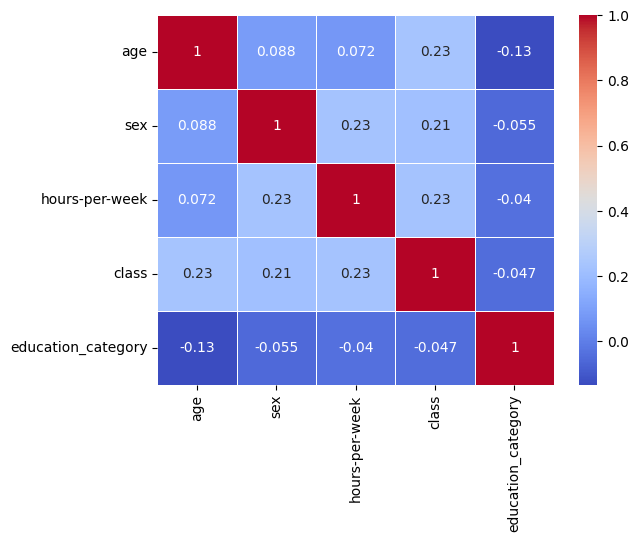

In [54]:
sns.heatmap(data_corr, cmap='coolwarm', annot=True, linewidths=0.5)

In [55]:
# 자산 감소, 증가, 주 근무 시간의 범주화

In [56]:
data1['capital-gain'].unique()

array([    0,  7688,  3103,  6418,  7298,  3908, 14084,  5178, 15024,
       99999,  2597,  2907,  4650,  6497,  1055,  5013, 27828,  4934,
        4064,  3674,  2174, 10605,  3418,   114,  2580,  3411,  4508,
        4386,  8614, 13550,  6849,  2463,  3137,  2885,  2964,  1471,
       10566,  2354,  1424,  1455,  3325,  4416, 25236,   594,  2105,
        4787,  2829,   401,  4865,  1264,  1506, 10520,  3464,  2653,
       20051,  4101,  1797,  2407,  3471,  1086,  1848, 14344,  1151,
        2993,  2290, 15020,  9386,  2202,  3818,  2176,  5455, 11678,
        7978,  7262,  6514, 41310,  3456,  7430,  2414,  2062, 34095,
        1831,  6723,  5060, 15831,  2977,  2346,  3273,  2329,  9562,
        2635,  4931,  1731,  6097,   914,  7896,  5556,  1409,  3781,
        3942,  2538,  3887, 25124,  7443,  5721,  1173,  4687,  6612,
        6767,  2961,   991,  2036,  2936,  2050,  1111,  2228, 22040,
        3432,  6360,  2009,  1639, 18481,  2387])

<Axes: ylabel='Frequency'>

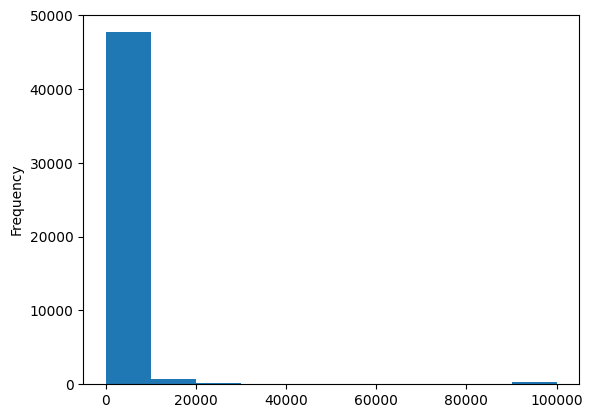

In [57]:
data1['capital-gain'].plot(kind='hist')

In [58]:
data1['capital-loss'].unique()

array([   0, 1721, 1876, 2415, 1887,  625, 1977, 2057, 1429, 1590, 1485,
       2051, 2377, 1672, 1628, 1902, 1602, 1741, 2444, 1408, 2001, 2042,
       1740, 1825, 1848, 1719, 3004, 2179, 1573, 2205, 1258, 2339, 1726,
       2258, 1340, 1504, 2559, 1668, 1974, 1980, 1564, 2547, 2002, 1669,
       1617,  323, 3175, 2472, 2174, 1579, 2129, 1510, 1735, 2282, 1870,
       1411, 1911, 1651, 1092, 1762, 2457, 2231, 2238,  653, 1138, 2246,
       2603, 2392, 1944, 1380, 2465, 1421, 3770, 1594,  213, 2149, 2824,
       1844, 2467, 2163, 1816, 1648, 2206, 2352,  419, 1539,  880,  810,
        974, 4356, 2489, 1755, 3683, 2267, 2080,  155, 3900, 2201, 2754])

<Axes: ylabel='Frequency'>

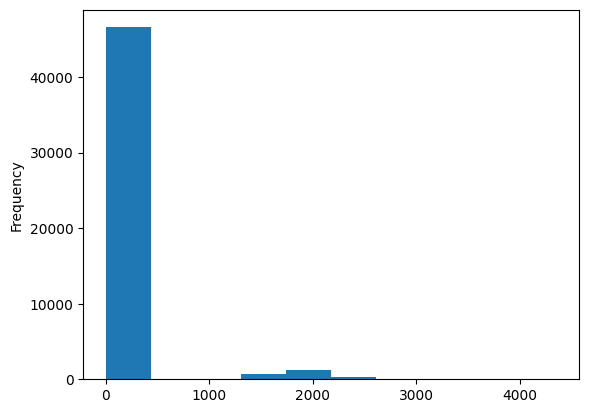

In [59]:
data1['capital-loss'].plot(kind='hist')

In [60]:
data1['hours-per-week'].unique()

array([40, 50, 30, 32, 10, 39, 35, 48, 25, 20, 45, 47,  6, 43, 90, 54, 60,
       38, 36, 18, 24, 44, 56, 28, 16, 41, 22, 55, 14, 33, 37,  8, 12, 70,
       15, 75, 52, 84, 42, 80, 68, 99, 65,  5, 17, 72, 53, 29, 96, 21, 46,
        3,  1, 23, 49, 67, 76,  7,  2, 58, 26, 34,  4, 51, 78, 63, 31, 92,
       77, 27, 85, 13, 19, 98, 62, 66, 57, 11, 86, 59,  9, 64, 73, 61, 88,
       79, 89, 74, 69, 87, 97, 94, 82, 91, 81, 95])

<Axes: ylabel='Frequency'>

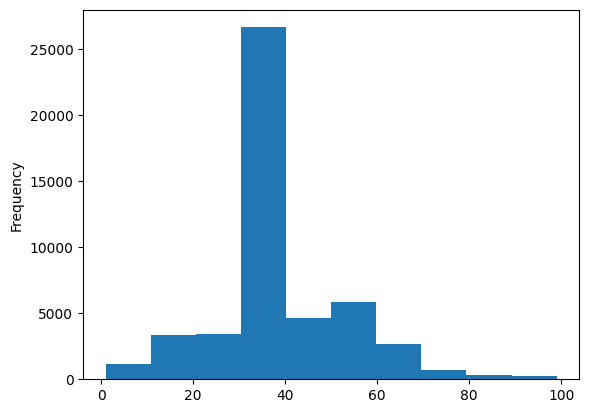

In [61]:
data1['hours-per-week'].plot(kind='hist')

<Axes: xlabel='hours-per-week', ylabel='Count'>

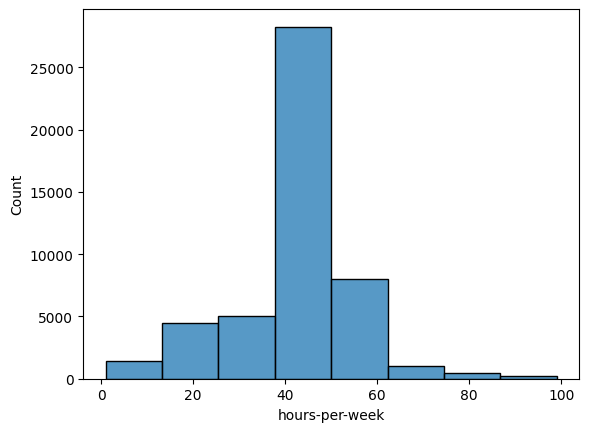

In [62]:
sns.histplot(data1['hours-per-week'], bins=8)

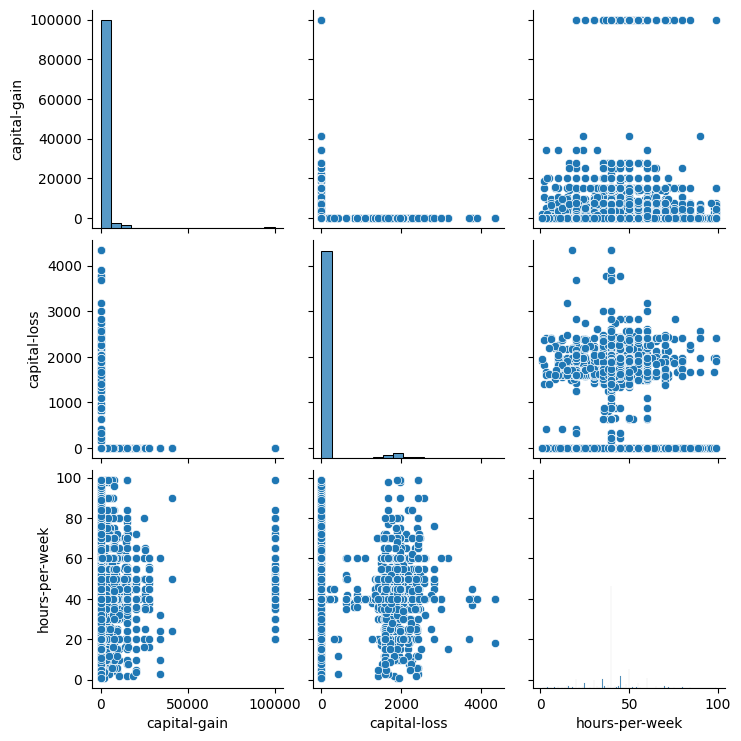

In [63]:
sns.pairplot(data[['capital-gain', 'capital-loss', 'hours-per-week']])

In [64]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 48842 non-null  int64 
 1   workclass           48842 non-null  object
 2   marital-status      48842 non-null  object
 3   occupation          48842 non-null  object
 4   relationship        48842 non-null  object
 5   race                48842 non-null  object
 6   sex                 48842 non-null  int64 
 7   capital-gain        48842 non-null  int64 
 8   capital-loss        48842 non-null  int64 
 9   hours-per-week      48842 non-null  int64 
 10  native-country      48842 non-null  object
 11  class               48842 non-null  int64 
 12  education_category  48842 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 4.8+ MB


# groupby로 독립변수와 종속변수간 규칙 찾기

<Axes: xlabel='class,sex'>

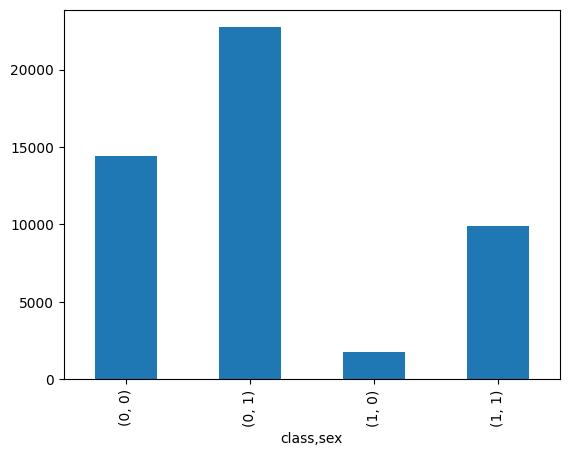

In [65]:
data1[['sex', 'class']].groupby('class').value_counts(sort=False).plot(kind='bar')

<Axes: xlabel='class,education_category'>

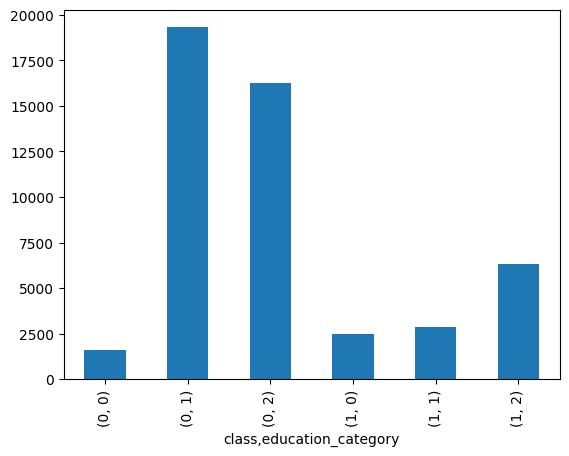

In [66]:
data1[['education_category', 'class']].groupby('class').value_counts(sort=False).plot(kind='bar')

In [67]:
le.classes_

array([' Female', ' Male'], dtype=object)

In [68]:
le2.classes_

array([' <=50K', ' >50K'], dtype=object)

In [69]:
le3.classes_

array(['고등 교육', '기본/중등 교육', '대학 교육'], dtype=object)

In [70]:
data1['capital-loss'].unique()

array([   0, 1721, 1876, 2415, 1887,  625, 1977, 2057, 1429, 1590, 1485,
       2051, 2377, 1672, 1628, 1902, 1602, 1741, 2444, 1408, 2001, 2042,
       1740, 1825, 1848, 1719, 3004, 2179, 1573, 2205, 1258, 2339, 1726,
       2258, 1340, 1504, 2559, 1668, 1974, 1980, 1564, 2547, 2002, 1669,
       1617,  323, 3175, 2472, 2174, 1579, 2129, 1510, 1735, 2282, 1870,
       1411, 1911, 1651, 1092, 1762, 2457, 2231, 2238,  653, 1138, 2246,
       2603, 2392, 1944, 1380, 2465, 1421, 3770, 1594,  213, 2149, 2824,
       1844, 2467, 2163, 1816, 1648, 2206, 2352,  419, 1539,  880,  810,
        974, 4356, 2489, 1755, 3683, 2267, 2080,  155, 3900, 2201, 2754])

In [71]:
def capitalgain(x):
    if 0 <= x < 1000:
        return "under1000"
    elif 1000 <= x < 5000:
        return "1000 to 4999"
    elif 5000 <= x < 10000:
        return "5000 to 9999"
    elif 10000 <= x:
        return "10000s"

In [72]:
def capitalloss(x):
    if 0 <= x < 1000:
        return "under1000"
    elif 1000 <= x < 2000:
        return "1000s"
    elif 2000 <= x < 3000:
        return "2000s"
    elif 3000 <= x < 4000:
        return "3000s"
    elif 4000 <= x < 5000:
        return "4000s"
    elif 5000 <= x:
        return "5000s"

In [73]:
def hoursperweek(x):
    if 0 <= x < 20:
        return "under20"
    elif 20 <= x < 40:
        return "20s"
    elif 40 <= x < 60:
        return "40s"
    elif 60 <= x < 80:
        return "80s"
    elif 80 <= x:
        return "over80"

In [74]:
data1['capital-gain'] = data1['capital-gain'].apply(capitalgain)

In [75]:
data1['capital-loss'] = data1['capital-loss'].apply(capitalloss)

In [76]:
data1['hours-per-week'] = data1['hours-per-week'].apply(hoursperweek)

In [77]:
data1.columns

Index(['age', 'workclass', 'marital-status', 'occupation', 'relationship',
       'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'class', 'education_category'],
      dtype='object')

In [78]:
data1.head(10)

,age,workclass,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,education_category
0,25,Private,Never-married,Machine-op-inspct,Own-child,Black,1,under1000,under1000,40s,United-States,0,1
1,38,Private,Married-civ-spouse,Farming-fishing,Husband,White,1,under1000,under1000,40s,United-States,0,1
2,28,Local-gov,Married-civ-spouse,Protective-serv,Husband,White,1,under1000,under1000,40s,United-States,1,2
3,44,Private,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,5000 to 9999,under1000,40s,United-States,1,2
4,18,Without-pay,Never-married,Other-service,Own-child,White,0,under1000,under1000,20s,United-States,0,2
5,34,Private,Never-married,Other-service,Not-in-family,White,1,under1000,under1000,20s,United-States,0,1
6,29,Without-pay,Never-married,Other-service,Unmarried,Black,1,under1000,under1000,40s,United-States,0,1
7,63,Self-emp-not-inc,Married-civ-spouse,Prof-specialty,Husband,White,1,1000 to 4999,under1000,20s,United-States,1,0
8,24,Private,Never-married,Other-service,Unmarried,White,0,under1000,under1000,40s,United-States,0,2
9,55,Private,Married-civ-spouse,Craft-repair,Husband,White,1,under1000,under1000,under20,United-States,0,1


In [79]:
# capital-gain 변환
data1['capital-gain'] = data1['capital-gain'].replace({
    'under1000': 0,
    '1000 to 4999': 1,
    '5000 to 9999': 2,
    '10000 to 19999': 3,
    '20000 or more': 4
})

# capital-loss 변환
data1['capital-loss'] = data1['capital-loss'].replace({
    'under1000': 0,
    '1000 to 4999': 1,
    '5000 to 9999': 2,
    '10000 to 19999': 3,
    '20000 or more': 4
})

In [80]:
data1['hours-per-week'] = data1['hours-per-week'].replace({
    'under20': 10,
    '20s': 20,
    '30s': 30,
    '40s': 40,
    '50s': 50,
    '60s': 60,
    '70s': 70,
    '80s': 80
})

In [81]:
data1.head()

,age,workclass,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,education_category
0,25,Private,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,0,1
1,38,Private,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,40,United-States,0,1
2,28,Local-gov,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States,1,2
3,44,Private,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,2,0,40,United-States,1,2
4,18,Without-pay,Never-married,Other-service,Own-child,White,0,0,0,20,United-States,0,2


In [84]:
data1[['education_category', 'hours-per-week', 'sex', 'class']].groupby(['education_category', 'hours-per-week', 'sex']).value_counts(sort=False)

education_category  hours-per-week  sex  class
0                   10              0    0          36
                                         1          15
                                    1    0          61
                                         1          33
                    20              0    0         151
                                         1          80
                                    1    0         148
                                         1         158
                    40              0    0         434
                                         1         264
                                    1    0         565
                                         1        1497
                    80              0    0          35
                                         1          55
                                    1    0         111
                                         1         359
                    over80          0    0          17
                  